In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

TASK: Create an image, e.g. 800x800 pixels, with the texture of a chessboard

In [50]:


def create_chessboard(dim = 800, line_color=(0,0,0)):
    # Create a black image with a single channel (grayscale)
    img = np.zeros(shape=(dim, dim, 3), dtype=np.uint8)

    num_divisions = int(dim / 10)

    #Color the square

    for i in range(0, num_divisions):

        for j in range(0, num_divisions):
            if i % 2 == 0:
                img[i*100:i*100+100, j*200:j*200+100] = 255
            else:
                img[i*100:i*100+100, j*200 +100:j*200+200] = 255
                
        #add the line
        cv2.line(img, (int(i*100), 0) , (int(i*100), dim),line_color, 4)
        cv2.line(img, (0,int(i*100)) , (dim,int(i*100)),line_color, 4)        

    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')  
    cv2.imwrite('chessboard.png', img)


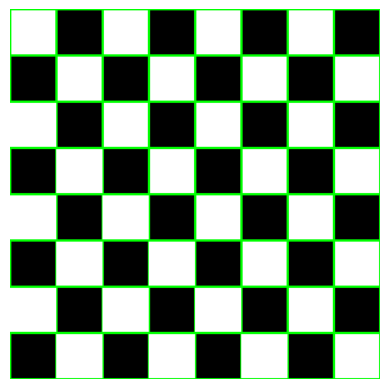

In [51]:
dim = 800

create_chessboard(dim, (0,255,0))

TASK: Create a Mondrian-style image 

True

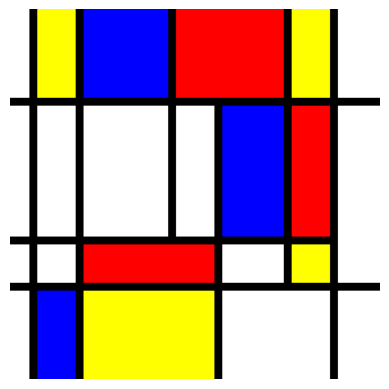

In [45]:
height = width = 800

img = np.full(shape=(height, width, 3), fill_value=255 ,dtype=np.uint8)


#Color the areas
#yellow
img[:200, 50:150] = (255,255,0)
img[:200, 600:700] = (255,255,0)
img[600:, 150:450] = (255,255,0)
img[500:600, 600:700] = (255,255,0)

#blue
img[:200, 150:350] = (0,0,255)
img[200:500, 450:600] = (0,0,255)
img[600:, 50:150] = (0,0,255)

#red
img[:200, 350:600] = (255,0,0)
img[200:500, 600:700] = (255,0,0)
img[500:600, 150:450] = (255,0,0)

#Draw the vertical lines
cv2.line(img, (50, 0), (50, height), (0,0,0), 15)
cv2.line(img, (150, 0), (150, height), (0,0,0), 15)
cv2.line(img, (350, 0), (350, 500), (0,0,0), 15)
cv2.line(img, (450, 200), (450, height), (0,0,0), 15)
cv2.line(img, (600, 0), (600, 600), (0,0,0), 15)
cv2.line(img, (700, 0), (700, height), (0,0,0), 15)

#Draw the orizontal lines
cv2.line(img, (0, 200), (width, 200), (0,0,0), 15 )
cv2.line(img, (0, 500), (width - 100, 500), (0,0,0), 15 )
cv2.line(img, (0, 600), (width, 600), (0,0,0), 15 )




plt.imshow(img)
plt.axis('off')
bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('mondrian.png', bgr_img)

TASK: Freely modify the values of one channel of the image

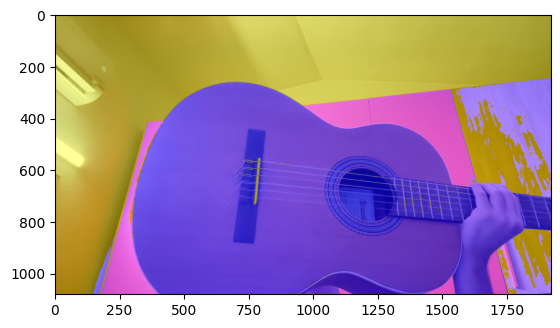

In [54]:
vid = cv2.VideoCapture(0)

if vid.isOpened():
    while True:
        
        ret, frame = vid.read()
        
        if ret:
            
            
            frame[:,:, 0] -= 100 # edit blue channel
            #frame[:,:, 1] += 100 # edit green channel
            #frame[:,:, 2] += 100 # edit red channel
                        
            cv2.imshow(winname='Video', mat=frame)
        
        if cv2.waitKey(20) == 27:
            break  
    
    vid.release()
    cv2.destroyAllWindows()
    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_frame)         
    cv2.imwrite('blue_channel_edit.png', frame)

TASK:
Draw circles at the positions of the brightest and darkest pixel in the image.
What if you wanted to do it over the brightest/darkest 8x8 region?

True

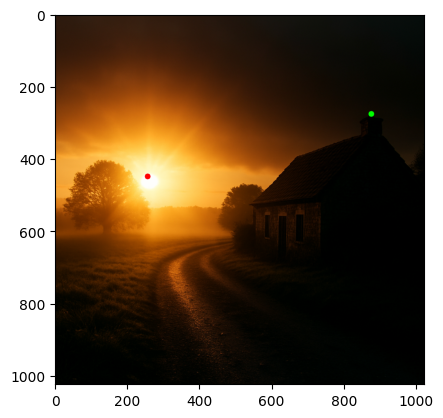

In [42]:

img = cv2.imread('image.png')
brightness = np.mean(img, axis=2)
max_pos = np.unravel_index(np.argmax(brightness), brightness.shape)
min_pos = np.unravel_index(np.argmin(brightness), brightness.shape)

cv2.circle(img, (max_pos[1], max_pos[0]), 8, (0,0,255), -1)
cv2.circle(img, (min_pos[1], min_pos[0]), 8, (0,255,0), -1)

    
    
rgb_img_with_circles = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img_with_circles)
cv2.imwrite('image_with_circles.png', img)


In [8]:
def brightess_region(brightness, region_block=8):
    
    height, width = brightness.shape
    
    max_brightness = -np.inf
    max_pos = (0,0)
    
    min_brightness = np.inf
    min_pos = (0,0)
    
    for i in range(0, width-region_block):
        for j in range(0, height-region_block):
            
            block_brightness = brightness[i:i+region_block, j:j+region_block]
            mean_block_brightness = np.mean(block_brightness)
            
            if mean_block_brightness > max_brightness:
                max_brightness = mean_block_brightness
                max_pos = (j,i)
                
            if mean_block_brightness < min_brightness:
                min_brightness = mean_block_brightness
                min_pos = (j,i)
    
    return max_pos, min_pos
    
    

In [9]:
region_block = 8

True

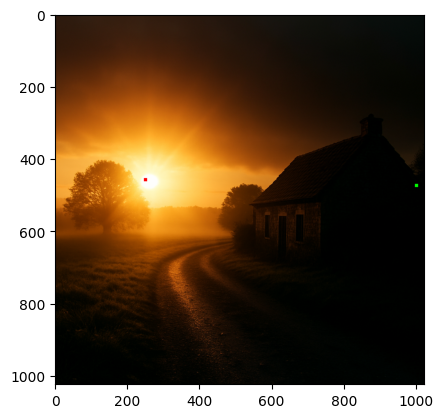

In [43]:

img = cv2.imread('image.png')
brightness = np.mean(img, axis=2)
max_pos, min_pos = brightess_region(brightness=brightness, region_block=region_block)

cv2.rectangle(img, max_pos, (max_pos[0]+region_block, max_pos[1]+region_block), (0,0,255),-1)
cv2.rectangle(img, min_pos, (min_pos[0]+region_block, min_pos[1]+region_block), (0,255,0),-1)
cv2.imshow(winname='Video', mat=img)



rgb_img_with_rect_region = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img_with_rect_region)
cv2.imwrite('image_with_rect_region.png', img)

TASK: Create your own pop art proposal

True

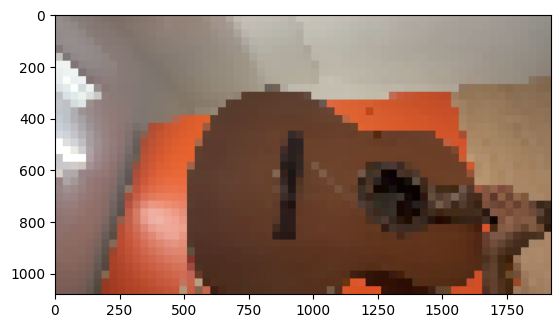

In [55]:
vid = cv2.VideoCapture(0)

ncells = 30

if vid.isOpened():
    while True:
        
        ret, frame = vid.read()
        
        if ret:
            
            
            h, w, c = frame.shape
            
            down_frame = cv2.resize(frame, (int(w/ncells), int(h/ncells)))
            
            h2, w2, c2 = down_frame.shape
            
            gris_up_frame = np.zeros((h2*ncells, w2*ncells, 3), dtype=np.uint8)
            
            for i in range(0, h2):
                for j in range(0, w2):
                    b, g, r = down_frame[i, j]
                    color = (int(b), int(g), int(r))
                    cv2.rectangle(gris_up_frame, (j*ncells, i*ncells), (j*ncells+ncells, i*ncells+ncells), color, -1)
            
            
            cv2.imshow(winname='Video', mat=gris_up_frame)
    
        if cv2.waitKey(20) == 27:
            break
    
    vid.release()
    cv2.destroyAllWindows()
    
rgb_gris_up_frame = cv2.cvtColor(gris_up_frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_gris_up_frame)
cv2.imwrite('downsampled_image.png', gris_up_frame)
